# **Introduction of pylibs**
* this document is a tutorial on how to use using pylibs with examples. 
* pylibs is a very light python libary, aimed to integrate most of the frequently used functions/objects/scripts in one place. 

* It mainly includes two types of functions: 
  * self-defined functions for various purpose
  * functions to handling pre/post-processing SCHISM model input/output. Particularly, it has many functions to manipulate information related to SCHISM grid.

## **Code Style: Our Goals**
* good **readability** 
* easy to **use**, easy to **maintain**
* concise and compact codes


## **[List of functions and classes](#LoF)**

(click the link above will direct to the list of pylib functions/classes/methods)


# **1. Pylibs Installation**
[video: install mambaforge and pylibs on windows](https://www.youtube.com/watch?v=TSrOETelXfw)

## **Method 1**: pip install from pypi.org repository
* pip install --index-url https://test.pypi.org/simple/ --extra-index-url https://pypi.org/simple pylibs4schism==0.1.10

Note: use `pip show pylibs4schism` to reveal the installation location.

## **Method 2**: pip install from the Github repository
* install necessary packages: **matplotlib numpy scipy pandas pyproj pyshp netCDF4 mpi4py ipython**, e.g. <br>
`mamba install matplotlib numpy scipy ...`

### **Method 2.1 (if you are a user)**: pip install using pylibs url
* install pylibs: **pip install git+https://github.com/wzhengui/pylibs.git**
  * you can also install tag version: **pip install git+https://github.com/wzhengui/pylibs.git@v0.1.11**

Note: use `pip show pylibs` to reveal the installation location.

###**Method 2.2 (if you frequently change the code)**: pip install in editable mode
* Clone the Github repo to your machine: `git clone https://github.com/wzhengui/pylibs.git`
* Under your "pylibs" directory: `pip install -e .`

Note: Method 2.2 will link the pacakge to your specified folder (instead of under the conda/mamba folder), so any changes under that folder would reflect directly in your environment. This is useful for testing code changes before pushing them to Git.

## **Method 3**: PYTHONPATH
* download pylibs: `git clone https://github.com/wzhengui/pylibs`
* add pylibs path in **PYTHONPATH** environmental variable. Exmaples: 
    * on C-Shell: `setenv PYTHONPATH 'MyDir/pylibs/`
    * on Bash-Shell: `export PYTHONPATH=MyDir/pylibs`
    * on Windows 10: `My PC -> Properties -> Advanced system settings -> Environment Variables -> System Variables -> New -> Variable:PYTHONPATH, Value:MyDir/pylibs`
* install necessary modules: **matplotlib numpy scipy pandas pyproj pyshp netCDF4 mpi4py ipython** <br> <br>

Note: <br>
      **1.** **mpi4py** is not needed if you are not intended to use pylibs to submit parallel jobs on HPC. <br>
      **2.** So far, I personally found **PYTHONPATH** method works best on most system. However, it needs special treatment if you have multiple python enviroments 

## **Example**: Install pylibs on Google Colab <br>
(Colab runs on Bash enviroment, and the current python version is 3.7.12)


In [40]:
#setup for google drive (perform similar things on your own system)
!pip install matplotlib numpy scipy pandas pyproj==3.0.0 pyshp netCDF4
!pip install git+https://github.com/wzhengui/pylibs.git

  Cloning https://github.com/wzhengui/pylibs.git to /tmp/pip-req-build-5ljs7sed
  Running command git clone -q https://github.com/wzhengui/pylibs.git /tmp/pip-req-build-5ljs7sed


## **Download sample files**

In [41]:
from pylib import * #import pylib 

#inputs
fnames=['hgrid.gr3','vgrid.in','CB.2dm','SFBayWQ_USGS.npz','noaa_elev.npz',
        'noaa_elev_station.bp','elev_model.dat','GEBCO.nc','CS.bp','SCHISM.local.build',
        'param.nml']
fids=('1YOngls_dr93KzWq3HqFuOvY0sJC1AiVi','1XyT1B8FTBdgSLMtU7e1nFixHkBkEGI0M',
      '1Y7oypYPchTPbaETwgu9r-NgpNmMvEhgg','1YSDyvUDIVKgRbhNKLCv9LzQicvDjVpVt',
      '1Y_RdklP7zaFklqAxcbh1QNgKQ0QobuHl','1YhJWkEdqzqEjPknJdGUwWjaY4vq51qkQ',
      '1YhKfMex21TlWdw6uvnP-E-bk-yUahRwL','1Z3OnnJMenIBBJ6hdZfZYgSpF2PynaJc6',
      '1ZJrXnhX8ZPpzBbFesB1saaXRomLIAqYI','1ZNwhmuiTW4l-aFLpRQaOZyeTg1LTAsOi',
      '1_Dg_SkVJZBnRgBJwAq9hNquebyrKFvkm')


#download files
if not fexist('data'): os.mkdir('data')
for fid,fname in zip(fids,fnames):
  if fexist('data/{}'.format(fname)): continue
  urlsave('https://docs.google.com/uc?export=download&id={}'.format(fid),'data/{}'.format(fname))

In [42]:
#you can also mount your Google Drive. This is not needed for using pylibs, but can allow python to access your files on Google Drive
# from google.colab import drive
# drive.mount('drive')
# sdir='drive/MyDrive/Python/tutorial_files'
# !ln -sf drive/MyDrive/Python/tutorial_files sdir

# **2. Import Pylibs**
Pylibs' functions/classes are included in **pylib** module


## **explicit import**
To import a certain function or class into the current namespace, we can use: **from pylib import mod_name**. 

In [43]:
# Here are some Examples:
import pylib as pl 
from pylib import read_schism_hgrid, read_schism_bpfile
from pylib import zdata, loadz, savez, ReadNC, WriteNC

## **implicit import**
For simplicity, we can also import all the functions/classes of pylibs into current namepace: **from pylib import \***

* In the following examples, implicit import method is used for convienience. 
* To change the examples or other coding to explicit import, just add corresponding prefix before the functions or classes. For exmaples: <br>
  * read_schism_hgrid => pylib.read_schism_hgrid
  * arange => np.arange

In [44]:
#import all frequently used funs/classes/modules
from pylib import *

# **3. Pylibs Structure**

## **3.1. File structure**
* **pylib.py**: this script is written to import frequently used modules/functions/classes
* **pyUtility**: directory of pylib functions/classes, which includes two major modules: 
  * **mylib.py**: self-defined functions/classes
  * **schism_file.py**: schism-grid related functions/classes
* **pyScripts**: directory of sample scripts for various purpose based on pylib
        


## **3.2. List of pylib functions and classes**
* [functions/modules](#LoF)

## **3.3. Add your own function/classes to Pylibs**
  * **1st**: put your fun/obj in mylib.py or schism_file.py
  * **2nd**: add your fun/obj name in pylib.py

  (note: do a demo here)

# **4. mylib functions/classes**

## **4.1 data capsule**
In Pylibs, we save our data (string, single int/float, array, or object) to be the attributes of an object (zdata class). 
* **zdata**: an empty class with its attributs to be used to store data/object 
* **savez**: save zdata as a numpy dataset (*.npz format)
* **loadz**: load zdata:

  

In [45]:
#Example 4.1.1
#usage of zdata,savez,and loadz

#get a data capsule
ds=zdata()

#save some data into the capsule
x=arange(0,20,0.1); y1=(x-10)**2/10; y2=abs(x-10)*sin(3*x)
ds.x=x
ds.y1=y1
ds.y2=y2
ds.title='zdata demo'

#save data to dist
savez('data/zdata_demo',ds)

#show data
!ls data

bad_quad.bp		GEBCO_contour_m200.shx	 noaa_elev_station.shp
CB.2dm			GEBCO.nc		 noaa_elev_station.shx
CS.bp			hgrid.gr3		 noaa_elev_station_utm.bp
elev_model.dat		hgrid.ll		 old.txt
GEBCO_contour_m0.dbf	netcdf_sample_modify.nc  param.nml
GEBCO_contour_m0.prj	netcdf_sample.nc	 SCHISM.local.build
GEBCO_contour_m0.shp	new.txt			 SFBayWQ_USGS.npz
GEBCO_contour_m0.shx	noaa_elev.npz		 tmp.prj
GEBCO_contour_m200.dbf	noaa_elev_station.bp	 vgrid.in
GEBCO_contour_m200.prj	noaa_elev_station.dbf	 zdata_demo.npz
GEBCO_contour_m200.shp	noaa_elev_station.prj


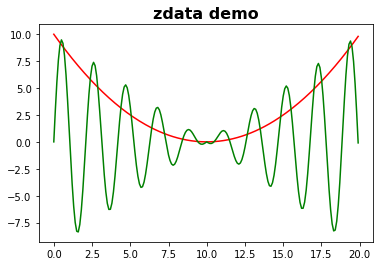

In [46]:
#load data and plots
S=loadz('data/zdata_demo.npz')
plot(S.x,S.y1,'r-')
plot(S.x,S.y2,'g-')
title(S.title,fontsize=16,fontweight='bold'); 

## **4.2. format of database in pylibs**
In order to conveniently analyze different observational data, we normally first **download all the data files**, and **processe** and **save** all data into one or several *.npz files.

In [47]:
#Example 4.2.1
#usage: working with database in pylibs

#load the entire USGS' water quality database in San Francisco Bay 
C=loadz('data/SFBayWQ_USGS.npz')

#C.VINFO gather all the data contained in SFBayWQ_USGS.npz
VINFO=[
'data: ndarray(1239859,) ,dtype=float64',
'depth: ndarray(1239859,) ,dtype=float64',
'station: ndarray(1239859,) ,dtype=float64',
'var: ndarray(1239859,) ,dtype=<U8'
'time: ndarray(1239859,) ,dtype=float64', 
"lat: <class 'dict'>",
"lon: <class 'dict'>", 
"units: <class 'dict'>",
]

# C.VINFO

In [48]:
#view all stations
print('stations: ', unique(C.station))

#view all variables
print('variables: ', unique(C.var))

#note (demo on how to search the database)

stations:  [  1.    2.    3.    4.    5.    6.    7.    8.    9.   10.   11.   12.
  12.5  13.   14.   15.   16.   17.   18.   19.   20.   21.   22.   23.
  24.   24.5  25.   25.5  26.   26.5  27.   27.5  28.   28.5  29.   29.5
  30.   30.5  31.   31.5  32.   33.   33.5  34.   35.   36.  405.  407.
 411.  649.  650.  651.  652.  653.  654.  655.  657.  659.  662. ]
variables:  ['DO' 'DO_cmpt' 'Ke' 'NH4' 'NO2' 'NO23' 'PO4' 'SPM' 'SPM_cmpt' 'SiO4'
 'chl' 'chl_cmpt' 'salt' 'temp']


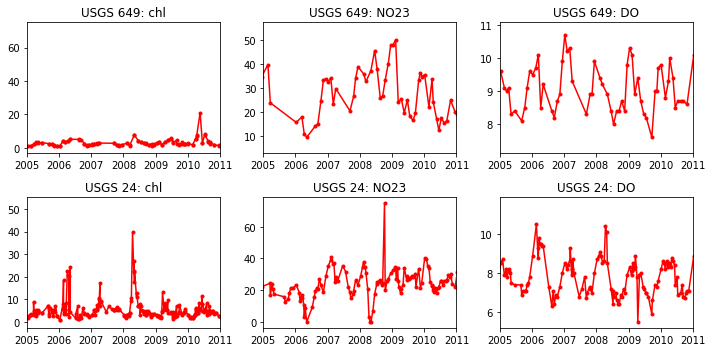

In [49]:
#Example 4.2.2
#plot near-surface DO, CHLA and NO23

#input
stations=[649, 24]
svars=['chl','NO23','DO']

# plot
figure(figsize=[10,5])
xts,xls=get_xtick()
for m,station in enumerate(stations):
  for i, svar in enumerate(svars): 
    #search the database
    fp=(C.station==station)*(C.var==svar)
    oti=C.time[fp]; oyi=C.data[fp]
    sind=argsort(oti); oti,oyi=oti[sind],oyi[sind]

    #plot
    subplot(2,3,m*3+i+1)
    plot(oti,oyi,'r.-')

    #annotation
    setp(gca(),xticks=xts,xticklabels=xls)
    setp(gca(),xlim=[datenum(2005,1,1),datenum(2011,1,1)])
    title('USGS {}: {}'.format(station,svar))
gcf().tight_layout()

## **4.3 time manipulation**
In pylibs, the datenum starts from **'0000-12-31'** (mpl.dates.get_epoch()). 

  * **datenum**: convert date-time to a date number
  * **get_xtick**: generate xticks and xticklables for plotting
  * **find_cs**: use to identily locations of data gaps in a time series
  * **daytime_length**: compute daytime length based on latitude and day_of_year


In [50]:
#Example 4.3.1 
#usage of datenum

#convert date to datenum
ti=datenum(2021,4,3,12,30,20)

#convert datenum to datetime object
dti=num2date(ti)

#convet datetime object to string
#tips: use get_xtick? to find the format
sti=dti.strftime('%Y-%m-%d, %H:%M:%S') 

#convert date string to number
tti=datestr2num(sti)

#print
print('ti:  ', ti)
print('dti: ', dti)
print('sti: ', sti)
print('tti: ', tti)

ti:   737883.5210648148
dti:  2021-04-03 12:30:20+00:00
sti:  2021-04-03, 12:30:20
tti:  737883.5210648148


In [51]:
#Example 4.3.2
#usage of get_xtick

#method 1:  for year
xts,xls=get_xtick()
# xts,xls=get_xtick(xts=[1950,1980])

#method 2: for month
# xts,xls=get_xtick(fmt=1,xts=[2000,2001],str='%b')
# xls[0]='2000'; xls[12]='2001'

#method 3: for day
# xts,xls=get_xtick(fmt=2,xts=[datenum(2000,2,1),datenum(2000,2,15)],str='%d/%b')

#show xticks and xticklabels
print(array(xts))
print(array(xls))

[730120. 730486. 730851. 731216. 731581. 731947. 732312. 732677. 733042.
 733408. 733773. 734138. 734503. 734869. 735234. 735599. 735964. 736330.
 736695. 737060. 737425. 737791. 738156. 738521. 738886.]
['2000' '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008' '2009'
 '2010' '2011' '2012' '2013' '2014' '2015' '2016' '2017' '2018' '2019'
 '2020' '2021' '2022' '2023' '2024']


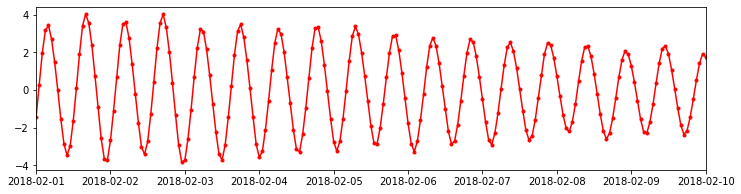

In [52]:
#Example 4.3.3 
#usage: plot with get_xtick

#load noaa elev database for Gulf of Maine stations
C=loadz('data/noaa_elev.npz')

#get data at noaa station 8410140
fp=(C.station==8410140)*(C.time>=datenum(2018,2,1))*(C.time<datenum(2018,3,1))
oti,oyi=C.time[fp],C.elev[fp]

#plot elevation data
figure(figsize=[12,3])
xts,xls=get_xtick(fmt=2,xts=[datenum(2018,2,1),datenum(2018,3,1)],str='%Y-%m-%d')

plot(oti,oyi,'r.-')
setp(gca(),xticks=xts,xticklabels=xls,xlim=[datenum(2018,2,1),datenum(2018,2,10)]); 


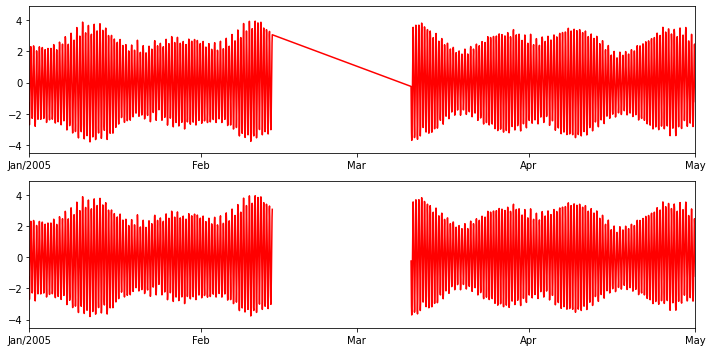

In [53]:
#Example 4.3.4
#usage: for find_cs

#get data at noaa station 8410140
fp=(C.station==8410140)
oti,oyi=C.time[fp],C.elev[fp]
sind=argsort(oti); oti,oyi=oti[sind],oyi[sind]

#find data gap
cs=find_cs(oti,1)
num2date(cs.gaps)

#plot data gap
xts,xls=get_xtick(fmt=1,xts=[2005,2005]); xls[0]=xls[0]+'/2005'

figure(figsize=[10,5])

subplot(2,1,1)
plot(oti,oyi,'r-')
setp(gca(),xticks=xts,xticklabels=xls,xlim=[datenum(2005,1,1),datenum(2005,5,1)]);

#remove the line in data gap
subplot(2,1,2)
soti=r_[oti,datenum(2005,3,1)]; soyi=r_[oyi,nan]
sind=argsort(soti); soti,soyi=soti[sind],soyi[sind]
plot(soti,soyi,'r-')
setp(gca(),xticks=xts,xticklabels=xls,xlim=[datenum(2005,1,1),datenum(2005,5,1)]);

gcf().tight_layout()

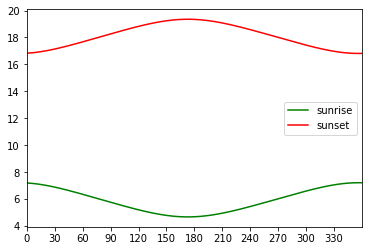

In [54]:
#Example 4.3.5
#usage of daytime_length

#plot the sunrise and sunset at Lat=35
doy=arange(1,366)
dtime=daytime_length(37,doy)
t1,t2=12-dtime/2,12+dtime/2

plot(doy,t1,'g-',doy,t2,'r-')
legend(['sunrise','sunset'])
setp(gca(),xticks=arange(0,360,30),xlim=[0,360]); 

## **4.4. data analysis**
Here are some functions for 
* **lpfilt**: low-pass filter
* **smooth**: smooth function
* **mfft**: Perform FFT for a time series
* **get_stat**: return frequently used statistics 
* **least_square_fit**: perform least square fit

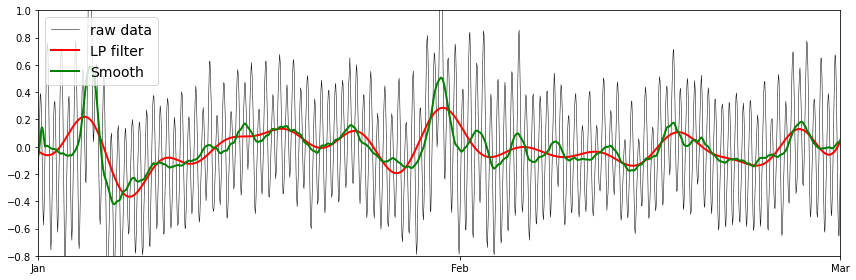

In [55]:
#Example 4.4.1
#lpfilt and smooth

#get data at noaa station 8410140
fp=(C.station==8449130)*(C.time>=datenum(2018,1,1))*(C.time<datenum(2018,4,1))
oti,oyi=C.time[fp],C.elev[fp]

#plot elevation data
figure(figsize=[12,4])
xts,xls=get_xtick(fmt=1,xts=[2018,2018],str='%b')

#low-pass filter time series
foyi=lpfilt(oyi,1/24,0.2)

#smooth time series
soyi=smooth(oyi,24)

#plot
plot(oti,oyi,'k-',lw=0.5)
plot(oti,foyi,'r',lw=2)
plot(oti,soyi,'g',lw=2)

legend(['raw data','LP filter','Smooth'],loc=2,fontsize=14)
setp(gca(),xticks=xts,xticklabels=xls,xlim=[datenum(2018,1,1),datenum(2018,3,1)],
     ylim=[-0.8,1.0])
gcf().tight_layout()

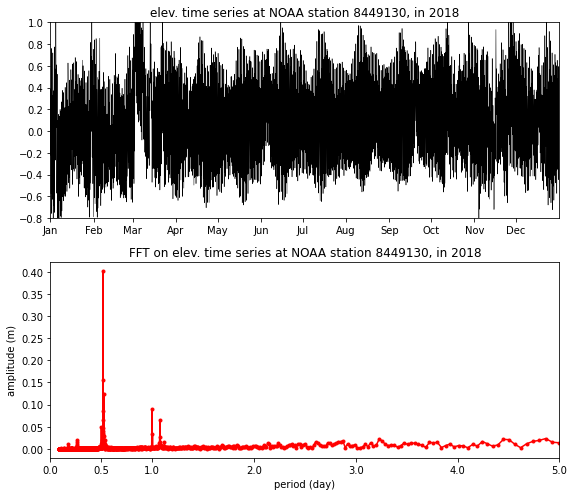

In [56]:
#Example 4.4.2
#usage of FFT

#get data at noaa station 8410140
fp=(C.station==8449130)*(C.time>=datenum(2018,1,1))*(C.time<datenum(2019,1,1))
oti,oyi=C.time[fp],C.elev[fp]

Period,Amp,Phase=mfft(oyi,1/24)

#plot
figure(figsize=[8,7])

subplot(2,1,1)
xts,xls=get_xtick(fmt=1,xts=[2018,2018],str='%b')
plot(oti,oyi,'k-',lw=0.5)
setp(gca(),xticks=xts,xticklabels=xls,xlim=[datenum(2018,1,1),datenum(2019,1,1)],ylim=[-0.8,1.0])
title('elev. time series at NOAA station 8449130, in 2018'); 

subplot(2,1,2)
plot(Period, Amp,'r.-')
setp(gca(),xticks=[0,0.5,*arange(1,6)],xlim=[0,5]);
xlabel('period (day)'); ylabel('amplitude (m)')
title('FFT on elev. time series at NOAA station 8449130, in 2018'); 
gcf().tight_layout()

Text([-0.44], [0.36], 'RMSD=0.168')

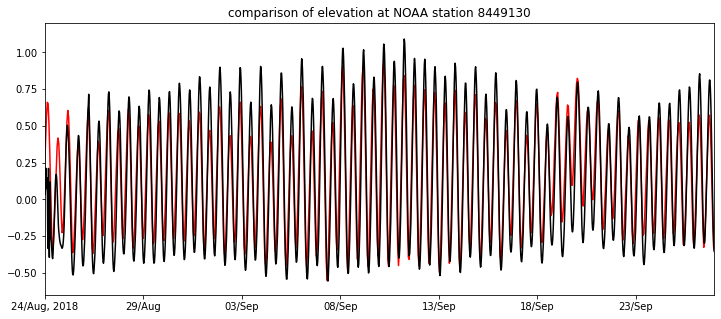

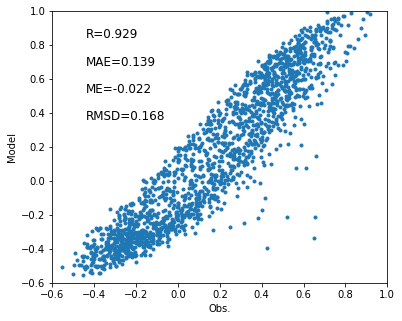

In [57]:
#Example 4.4.3
#usage: plot obs versus model with statistics

#read model results; starting date is 2018-8-24
fd=loadtxt('data/elev_model.dat') 
mti=fd[:,0]+datenum(2018,8,24); fd=fd[:,1:]

#get time series of simulation at station 8449130
bp=read_schism_bpfile('data/noaa_elev_station.bp')
sid=nonzero(bp.station=='8449130')[0][0]
myi=fd[:,sid]

#get time series of obs. at station 8449130
fp=(C.station==8449130)*(C.time>=datenum(2018,8,23))*(C.time<datenum(2018,10,1))
oti,oyi=C.time[fp],C.elev[fp]

#plot
figure(figsize=[12,5])
xts,xls=get_xtick(fmt=2,xts=[datenum(2018,8,24),datenum(2018,10,1)],str='%d/%b')
xts,xls=xts[::5],xls[::5]; xls[0]=xls[0]+', 2018'

plot(oti,oyi,'r-'); plot(mti,myi,'k-')
setp(gca(),xticks=xts,xticklabels=xls,xlim=[datenum(2018,8,24),datenum(2018,9,27)],
     ylim=[-0.65,1.2]);
title('comparison of elevation at NOAA station 8449130'); 

figure(figsize=[6,5])

#plot with statistical data
xm=[-0.6,1]; ym=[-0.6,1]
soyi=interpolate.interp1d(oti,oyi)(mti)
st=get_stat(myi,soyi)
plot(soyi,myi,'.')
xlabel('Obs.'); ylabel('Model')
setp(gca(),xlim=xm,ylim=ym)

#stat data
text(xm[0]+0.1*diff(xm),ym[0]+0.9*diff(ym),'R={:0.3f}'.format(st.R),fontsize=12)
text(xm[0]+0.1*diff(xm),ym[0]+0.8*diff(ym),'MAE={:0.3f}'.format(st.MAE),fontsize=12)
text(xm[0]+0.1*diff(xm),ym[0]+0.7*diff(ym),'ME={:0.3f}'.format(st.ME),fontsize=12)
text(xm[0]+0.1*diff(xm),ym[0]+0.6*diff(ym),'RMSD={:0.3f}'.format(st.RMSD),fontsize=12)

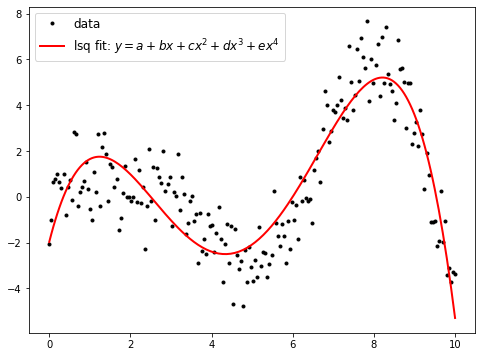

In [58]:
#Example 4.4.4
#usage of least_square_fit

#fake some data
npt=200; x=linspace(0,10,npt)
y=randn(npt)+abs(x-2)*sin(x)

#use function y=a+b*x+c*x^2+d*x^3+e*x^4 to fit the data
AA=c_[ones(npt),x,x**2,x**3,x**4]
# AA=c_[ones(npt),x,x**2,x**3,x**4,x**5,x**6,x**7,x**8] #try much higher polynomial
CC,fy=least_square_fit(AA,y)

#plot
figure(figsize=[8,6])
plot(x,y,'k.')
plot(x,fy,'r',lw=2)
legend(['data',r'lsq fit: $y=a+bx+cx^2+dx^3+ex^4$'],loc=2,fontsize=12)

## **4.5. harmonic analysis**
At present, HA is driven by "tidal_analysis.c". In the future, we will use ttide (python version) to get rid of this dependency
  * **harmonic_analysis**: get tidal harmonic consituents from time sereis
  * **harmonic_fit**: use harmonic consituents to compute time series

  (note, maybe a demo on sciclone)

## **4.6. netcdf**
These two functions are used to handle netcdf format
  * **ReadNC**: read netcdf file content as zdata format
  * **WriteNC**: write netcdf file content 

In [59]:
#Example 4.6.1
#usage of ReadNC

#-----------------------------------------------------
#method 1: read DEM file for Gulf of Maine region
#-----------------------------------------------------
C=ReadNC('data/GEBCO.nc')  
# C.VINFO #show variable informat

#get variable values
x=array(C.lon.val)
y=array(C.lat.val)
elev=array(C.elev.val)

#-----------------------------------------------------
#method 2: read DEM file for Gulf of Maine region
#-----------------------------------------------------
# C=ReadNC('data/GEBCO.nc',2)  
# # C.VINFO #show variable informat

# #get variable values
# x=array(C.lon)
# y=array(C.lat)
# elev=array(C.elev)

#-----------------------------------------------------
#method 3: read DEM file for Gulf of Maine region
#-----------------------------------------------------
# C=ReadNC('data/GEBCO.nc',1)  
# # svars=[*C.variables] #show variable informat
# # svars=[*C.dimensions] #show variable informat

# #get variable values
# x=array(C.variables['lon'][:])
# y=array(C.variables['lat'][:])
# elev=array(C.variables['elev'][:])
# C.close()

#-----------------------------------------------------
#plot DEM
#-----------------------------------------------------
# levels=[*linspace(-6000,-300,10),*linspace(-200,0,25),*linspace(5,500,10)]
# figure(figsize=[10,6]); set_cmap('jet')
# contourf(x,y,elev,levels=levels,vmin=-6e3,vmax=500)
# colorbar()

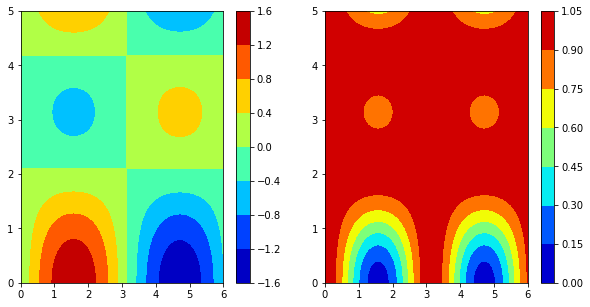

In [60]:
#Example 4.6.2
#usage of WriteNC

#-----------------------------------------------------
#method 1: create a netcdf from scratch 
#-----------------------------------------------------
#fake some data
x=linspace(0,6,100); y=linspace(0,5,200); 
z=sin(x[None,:])*(cos(y[:,None])+0.5)
# contourf(x,y,z,levels=100); colorbar() #plots

#create a new netcdf files
C=zdata()

#attributes (e.g. netcdf format)
C.file_format='NETCDF4'
C.note='netcdf examples' 

#define dimensions
C.dimname=['X-Axis','Y-Axis']; C.dims=[100,200]

#define variables
C.vars=['x','y','z']

#add variable z
vi=zdata() #get an empty zdata class
vi.dimname=['Y-Axis','X-Axis']; #declear dimension
vi.attrs=['note','size']; vi.note='this is the attribute of data'; vi.size=z.size #add attributes
vi.val=z #add values
C.z=vi #put vi as an attribute of C

#add variables x and y
vi=zdata(); vi.dimname=['X-Axis']; vi.val=x; C.x=vi
vi=zdata(); vi.dimname=['Y-Axis']; vi.val=y; C.y=vi

#write netcdf 
WriteNC('data/netcdf_sample.nc',C)


#-----------------------------------------------------
#method 2: modify a netcdf file
#-----------------------------------------------------
#read data
C=ReadNC('data/netcdf_sample.nc')

#modify value
C.z.val=cos(C.z.val)

#write a new file
WriteNC('data/netcdf_sample_modify.nc',C)

#plot
C1=ReadNC('data/netcdf_sample.nc')
C2=ReadNC('data/netcdf_sample_modify.nc')
figure(figsize=[10,5])

subplot(1,2,1)
contourf(C1.x.val,C1.y.val,C1.z.val); colorbar()

subplot(1,2,2)
contourf(C2.x.val,C2.y.val,C2.z.val); colorbar()


## **4.7 projection** 
  * **proj**: convert coordinates between different projections
  * **proj_pts**: convert coordinates of points between different projections
  * **get_prj_file**: get string of projection file (*.prj) 

In [61]:
#Example 4.7.1
#usage of proj

#tranform SCHISM grid
proj('data/hgrid.gr3',0,'epsg:26918','data/hgrid.ll',0,'epsg:4326')


#tranform ACE/gredit bpfile
proj('data/noaa_elev_station.bp',1,'epsg:4326','data/noaa_elev_station_utm.bp',1,'epsg:26918')

In [62]:
#Example 4.7.2
#usage of proj_pts

gd=read_schism_hgrid('data/hgrid.gr3')
px,py=proj_pts(gd.x,gd.y,'epsg:26918','epsg:4326')

In [63]:
# from matplotlib.projections import get_projection_class
#Example 4.7.3
#usage of get_prj_file

#write *.prj for shapefile
pstr=get_prj_file('epsg:26918')
fid=open('data/tmp.prj','w+'); fid.write(pstr); fid.close()

## **4.8 shapefile**
The two functions below are used to deal with shapefile. At present, they can handle three types of geometry data: POINT, LINE, POLYGON
  * **read_shapefile_data**: read shapefile as zdata format
  * **write_shapefile_data**: write shapefile


In [64]:
#Example 4.8.1
#usage of write_shapefile_data 

#get some data
bp=read_schism_bpfile('data/noaa_elev_station_utm.bp')

#prepare data for shapefile
C=zdata()                                 #get a data capsule
C.type='POINT'                            #define type
C.prj=get_prj_file('epsg:26918')          #define type
C.xy=c_[bp.x,bp.y]                        #coordinates of points
C.attname=['station','station_id']                               #add attribute names
C.attvalue=array([bp.station,arange(bp.nsta)+1],dtype='O')       #add attribute values

#write shapefile
write_shapefile_data('data/noaa_elev_station',C)

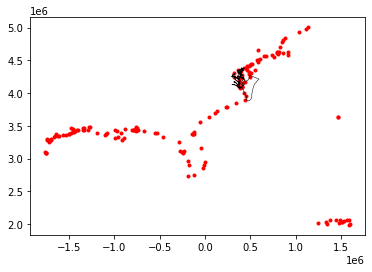

In [65]:
#Example 4.8.2
#usage of read_shapefile_data 

#read data
bp=read_shapefile_data('data/noaa_elev_station.shp')

#plot points read from shapefile
px,py=bp.xy.T
gd=read_schism_hgrid('data/hgrid.gr3')

plot(px,py,'r.')
gd.plot_bnd()


## **4.9 geometry related**
  * **inside_polygon**: identify the points inside a polygon
  * **near_pts**: find the indices of nearest points 


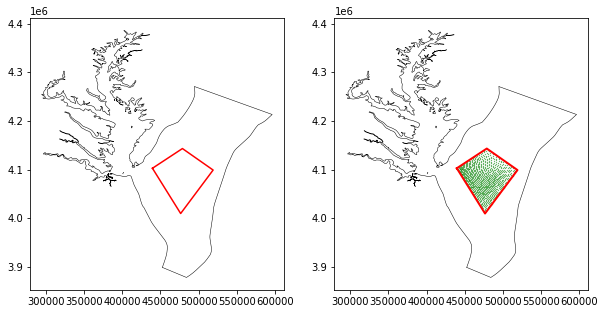

In [66]:
#Example 4.9.1 
#usgae of inside_polygon

#read reg and points
gd=read_schism_hgrid('data/hgrid.gr3')
bp=read_schism_bpfile('data/CS.bp') 

#find the points inside region
sindp=inside_polygon(c_[gd.x,gd.y],bp.x,bp.y)

#plots
figure(figsize=[10,5])

subplot(1,2,1)
px,py=close_data_loop(c_[bp.x,bp.y]).T
plot(px,py,'r')
gd.plot_bnd(c='k')

subplot(1,2,2)
px,py=close_data_loop(c_[bp.x,bp.y]).T
gd.plot_bnd(c='k')
fp=sindp==1; plot(gd.x[fp],gd.y[fp],'g.',ms=0.5)
plot(px,py,'r',lw=2)

[3880000.0, 4300000.0, 400000.0, 550000.0]

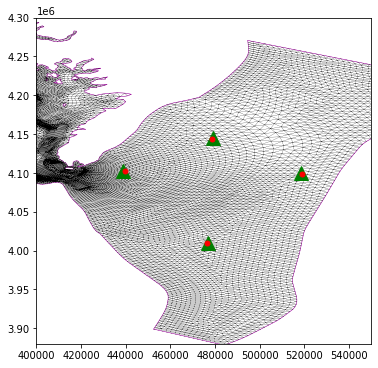

In [67]:
#Example 4.9.2
#usgae of near_pts

#read points
gd=read_schism_hgrid('data/hgrid.gr3')
bp=read_schism_bpfile('data/CS.bp')

#find nearest points of (bp.x, bp.y)
sindp=near_pts(c_[bp.x,bp.y],c_[gd.x,gd.y])

#plots
figure(figsize=[6,6])
gd.plot_bnd(c='m')
gd.plot()
plot(gd.x[sindp], gd.y[sindp],'g^',ms=14)
plot(bp.x,bp.y,'r.',ms=10)
setp(gca(),xlim=[4e5,5.5e5],ylim=[3.88e6,4.3e6])

## **4.10 DEM related**
The first two functions below are used to interpolated DEM data to points. 
  * **convert_dem_format**: convert DEM file in *.asc format to *.npz format
  * **load_bathymetry**: interoplated DEM data to points
  * **compute_contour**: extract contours from a 2D data 

extracting contours in subdomain: 1/1


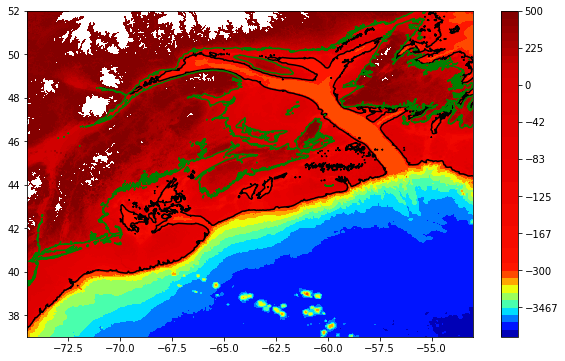

In [68]:
#Example 4.10.1
#usgae of compute_contour

#read DEM data
C=ReadNC('data/GEBCO.nc')
x,y,elev=array(C.lon.val),array(C.lat.val),array(C.elev.val)

#compute contours
levels=[-200,0]
S=compute_contour(x,y,elev,levels,fname='data/GEBCO_contour')

#plots contour lines
levels=[*linspace(-6000,-300,10),*linspace(-200,0,25),*linspace(5,500,10)]
figure(figsize=[10,6]); set_cmap('jet')
contourf(x,y,elev,levels=levels,vmin=-6e3,vmax=500)
x,y=S.xy[0].T; plot(x,y,'k-')
x,y=S.xy[1].T; plot(x,y,'g-')
colorbar()

## **4.11. plot**
  * **plot_taylor_diagram**: a function to play taylor diagram
  * **get_subplot_position**: get axes of subplots
  * **move_figure**: move figure to certain position 


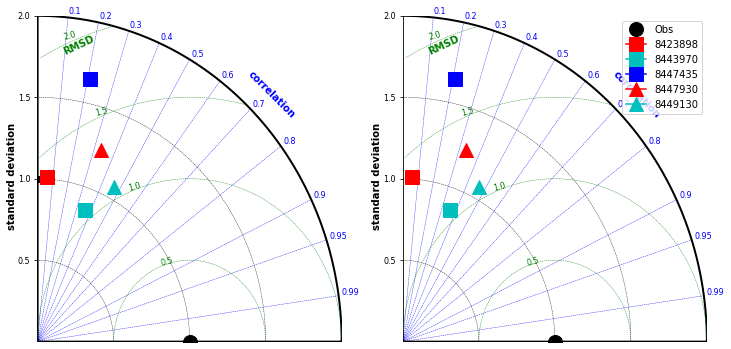

In [69]:
#Example 4.11.1
#usage of plot_talyor diagram

#read station info.
bp=read_schism_bpfile('data/noaa_elev_station.bp')

#load noaa elev database for Gulf of Maine stations
C=loadz('data/noaa_elev.npz')
stations=unique(C.station) #[i for i in unique(C.station) if i in bp.station.astype('int')]

#read model results; starting date is 2018-8-24
fd=loadtxt('data/elev_model.dat') 
mti=fd[:,0]+datenum(2018,8,24); fd=fd[:,1:]


#get time series of simulation at stations and statistics
tp_data=[]
for m,station in enumerate(stations):
  sid=nonzero(bp.station=='{}'.format(station))[0][0]
  myi=fd[:,sid] #model
  soyi=interpolate.interp1d(oti,oyi)(mti) #obs

  fmyi=lpfilt(myi,1/48,0.5); foyi=lpfilt(soyi,1/48,0.5)

  #save stat
  C=get_stat(fmyi,foyi)
  tp_data.append(C.taylor)

#get normalized RMSD, STD and R
tp_data=array(tp_data)
STD,RMSD,R=tp_data.T

#only keep positive R
fp=R>0; STD,R,stations=STD[fp],R[fp],stations[fp]


#plot taylor diagram
figure(figsize=[12,6])
cs=['r','c','b']; ms=['s','^','o']

#method 1
subplot(1,2,1)
ha=plot_taylor_diagram(R,STD)
plot(1,0,'ko',markersize=14)

#set point style
for m,station in enumerate(stations):  
  setp(ha.hp[m],color=cs[m%3],marker=ms[int(m/3)],ms=14)


#method 2
subplot(1,2,2)
ha=plot_taylor_diagram()
plot(1,0,'ko',markersize=14,label='Obs')

#set point style
for m,station in enumerate(stations):  
  ri,stdi=R[m],STD[m]
  plot(stdi*ri,stdi*sqrt(1-ri**2),marker=ms[int(m/3)],color=cs[m%3],ms=14,label=station)
hl=legend()

## **4.12 system related**
  * **command_outputs**: run a system command, and grab the outpus
  * **get_hpc_command**: get commands for submmitting or running HPC jobs.

## **4.13. misc**
  * **rewrite**: function to rewrite file in-situ based on conditions
  * **rewrite_input**: function to rewrite the inputs in job-submit scripts
  * **read_yaml**: read parameter in yaml file
  * **mdivide**: perform matrix division B/A
  * **signa**: compute signed area for triangles
  * **close_data_loop**: if xi[0,...]!=xi[-1,...], then,add xi[0,...] in the end
  * **convert_matfile**: convert matlab file (*.mat) to zdata (*.npz)
  * **get_hycom**: extract Hycom time series at stations (maybe outdated)


In [70]:
#Example 4.13.1
#usage of rewite

#copy file (not to rewrite the original files)
!cp data/SCHISM.local.build  data/old.txt
!cp data/SCHISM.local.build  data/new.txt

#write file in-site
fname='data/new.txt'

modules=['COSINE']
rewrite(fname,replace=['ON','OFF'],include=['USE_','PREC_EVAP','OLDIO'])
rewrite(fname,replace=['OFF','ON'],include=[i if i in ['OLDIO','PREC_EVAP'] else 'USE_{}'.format(i) for i in modules])
rewrite(fname,replace=[],include=['FABM_BASE'])
rewrite(fname,append=['set( FABM_BASE /home/... CACHE STRING "Path to FABM base")\n'])

#see different
!diff data/old.txt data/new.txt

20c20
< set (OLDIO ON CACHE BOOLEAN "Old nc output (each rank dumps its own data)")
---
> set (OLDIO OFF CACHE BOOLEAN "Old nc output (each rank dumps its own data)")
22c22
< set (PREC_EVAP ON CACHE BOOLEAN "Include precipitation and evaporation calculation")
---
> set (PREC_EVAP OFF CACHE BOOLEAN "Include precipitation and evaporation calculation")
41c41
< set( USE_ICM ON  CACHE BOOLEAN "Use ICM module")
---
> set( USE_ICM OFF  CACHE BOOLEAN "Use ICM module")
44c44
< set( USE_COSINE OFF   CACHE BOOLEAN "Use CoSiNE module")
---
> set( USE_COSINE ON   CACHE BOOLEAN "Use CoSiNE module")
56c56
< set( FABM_BASE /sciclone/home10/wangzg/fabm CACHE STRING "Path to FABM base")
---
> set( FABM_BASE /home/... CACHE STRING "Path to FABM base")


# **5. schism_file functions/classes**

## **5.1. hgrid**
* **schism_grid**: class of horizontal grid
* **read_schism_hgrid**: read hgrid.gr3, and return object of schism_grid class

In [71]:
#Exmaple 5.1.1
#usage of read_schism_hgrid

#read hgrid about Chesapkeake Bay
gd=read_schism_hgrid('data/hgrid.gr3')
gd.compute_all()

#show attributes and methods
attrs=list(gd.__dict__.keys())
methods=[i for i in dir(gd) if (not i.startswith('__')) and (i not in attrs)]

print('attributes:', array(attrs))
print('methods:', array(methods))

attributes: ['source_file' 'ne' 'np' 'x' 'y' 'dp' 'i34' 'elnode' 'ns' 'nob' 'nobn'
 'iobn' 'nlb' 'nlbn' 'ilbn' 'island' 'xctr' 'yctr' 'dpe' 'area'
 'isidenode' 'isdel' 'xcj' 'ycj' 'dps' 'distj' 'nne' 'mnei' 'ine' 'indel'
 'elside' 'ic3']
methods: ['check_quads' 'check_skew_elems' 'compute_acor' 'compute_all'
 'compute_area' 'compute_bnd' 'compute_ctr' 'compute_gradient'
 'compute_ic3' 'compute_nne' 'compute_node_ball' 'compute_side'
 'create_bnd' 'grd2sms' 'inside_elem' 'inside_grid' 'interp'
 'interp_elem_to_node' 'interp_node_to_elem' 'plot' 'plot_bad_quads'
 'plot_bnd' 'plot_grid' 'proj' 'query_pt' 'read_hgrid' 'read_prop' 'save'
 'split_quads' 'write_bnd' 'write_hgrid' 'write_prop'
 'write_shapefile_bnd' 'write_shapefile_element' 'write_shapefile_node']


### **5.1.1. attributes of hgrid**
* **node** <a name="gd_attr"></a>
  * **np**: numbers of nodes
  * **x**, **y**, **dp**: x&y coordinates and depth
  * **lon**, **lat**: longitude&latitude (may not exist)
* **element** 
  * **ne**: numbers of elements
  * **i34**: element types
  * **elnode**: element to node table
  * **xctr**, **yctr**, **dpe**: the x&y coordinates and depth at element center
  * **area**: element area
  * **elside**: element to side table
  * **ic3**: element-side-element table
* **side** 
  * **ns**: numbers of sides
  * **isidenode**: side to node table
  * **isdel**: side to element table
  * **xcj**, **ycj**, **dps**: the x&y coordinates and depth at side center
  * **distj**: side length
* **node ball**
  * **mnei**:  maximum number of elements in nodal ball
  * **nne**:   number of elements in nodal ball
  * **indel**: indices for each nodal ball
  * **ine**:   indices for each nodal ball, but with maxtrix shape=[np,mnei]
* **bnoundary**
  * **nob**: number of open boundary segments
  * **nobn**: number of nodes on each open boundary segment
  * **iobn**: node indices of each open boundary segment
  * **nlb**: number of land boundary segments 
  * **nlbn**: number of nodes on each land boundary segment  
  * **ilbn**: node indices of each land boundary segment
  * **island**: flag for wheter land boundary segment is a enclosed island
* **gradient**
  * **dpdx**: gradient along x-axis at node
  * **dpdy**: gradient along y-axis at node
  * **dpdxy**: gradient magnitude at node
  * **dpedx**: gradient along x-axis at element
  * **dpedy**: gradient along y-axis at element
  * **dpedxy**: gradient magnitude at element


### **5.1.2. methods of hgrid**

#### **5.1.2.1. plot**
  * **plot_grid** or **plot**: plot grid and/or depth
  * **plot_bnd**: plot grid boundary
  * **plot_bad_quads**: plot locations of bad-quality quads


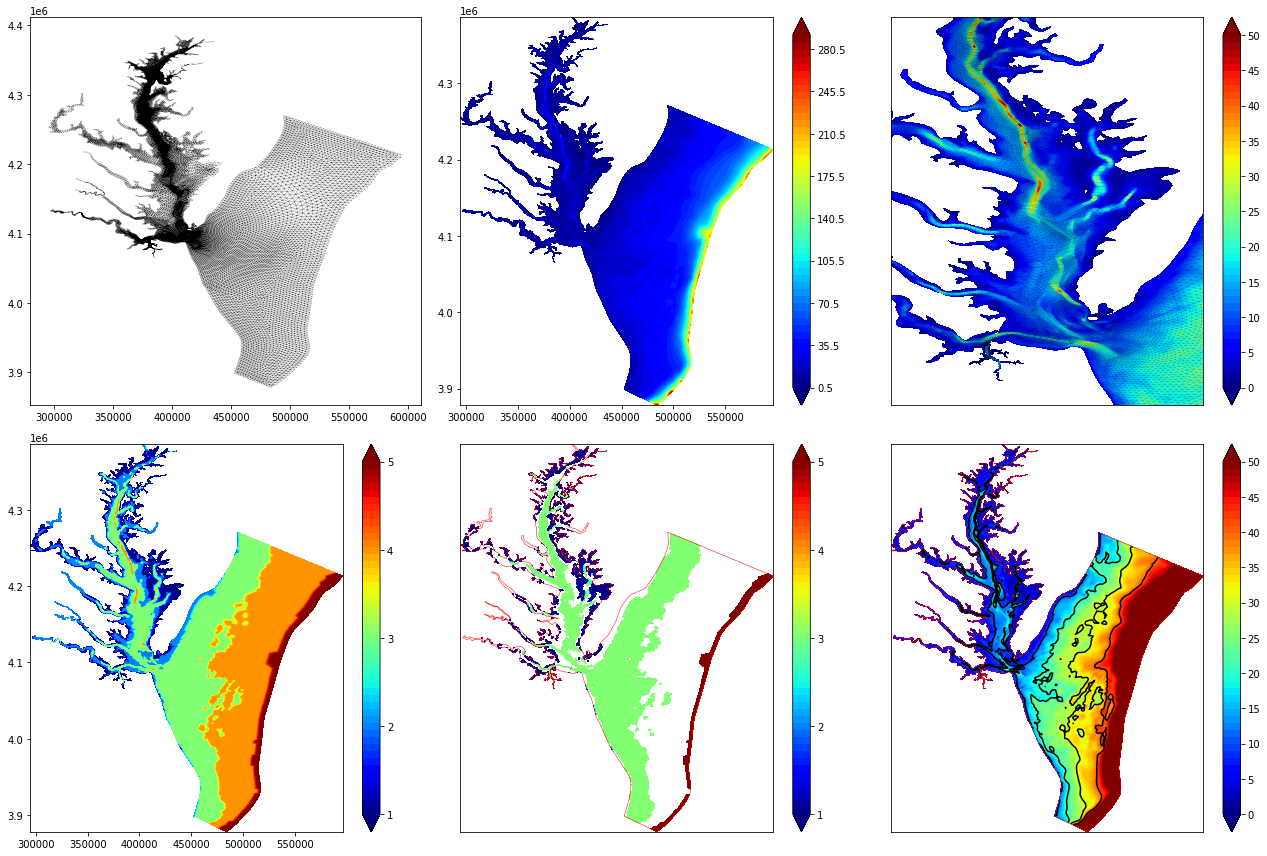

In [72]:
#Examples 5.1.2.1.1
#usage of plot

figure(figsize=[18,12])
#method 1: grid
subplot(2,3,1)
gd.plot()

#method 2: bathymetry
subplot(2,3,2)
gd.plot(fmt=1)

#method 3: combine specifications
subplot(2,3,3)
gd.plot(fmt=1,ec='k',lw=0.05,clim=[0,50],ticks=11)
setp(gca(),xticks=[],yticks=[],xlim=[3.5e5,4.5e5],ylim=[4.05e6,4.3e6])
gcf().tight_layout()


#method 4: plot with other value
pvi=gd.dp.copy()
fpz=pvi<5; pvi[fpz]=1
fpz=(pvi>=5)*(pvi<10); pvi[fpz]=2
fpz=(pvi>=10)*(pvi<30); pvi[fpz]=3
fpz=(pvi>=30)*(pvi<100); pvi[fpz]=4
fpz=pvi>=100; pvi[fpz]=5

subplot(2,3,4)
gd.plot(fmt=1,value=pvi,clim=[1,5],ticks=5)

#method 5: add some masks
fpn=(pvi==4)|(pvi==2); pvi[fpn]=nan

subplot(2,3,5)
gd.plot(fmt=1,value=pvi,clim=[1,5],ticks=5)
gd.plot_bnd(c='r')
setp(gca(),xticks=[],yticks=[])

#method 6: add some contour lines

#code for plotting unstrcutred grid

#create triangles
fp3=gd.i34==3; fp4=gd.i34==4
tri=r_[gd.elnode[:,:3],c_[gd.elnode[fp4,0],gd.elnode[fp4,2:]]]
levels=[0,10,20,30,40]

subplot(2,3,6)
gd.plot(fmt=1,clim=[0,50],ticks=11)
ha=tricontour(gd.x,gd.y,tri,gd.dp,levels=levels,colors='k')
gd.plot_bnd(c='r')
setp(gca(),xticks=[],yticks=[])

gcf().tight_layout()


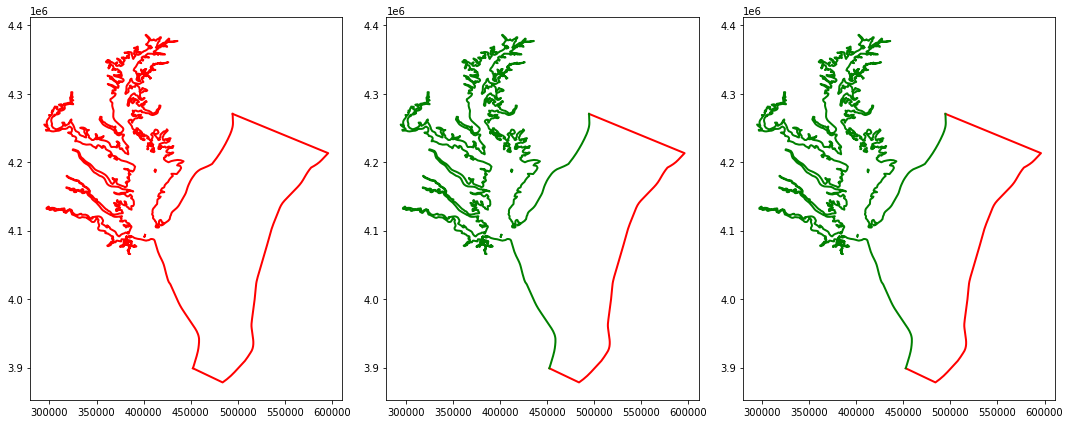

In [73]:
#Examples 5.1.2.1.2
#usage of plot_bnd

figure(figsize=[15,6])

#method 1
subplot(1,3,1)
gd.plot_bnd(c='r',lw=2)

#method 2: red(green) line for open(land) boundary
subplot(1,3,2)
gd.plot_bnd(c='rg',lw=2)

#method 3: plot boudaries directly by refering to the segments
subplot(1,3,3)
for i in arange(gd.nob):
  sind=gd.iobn[i]; xi,yi=gd.x[sind],gd.y[sind]
  plot(xi,yi,'r-',lw=2)

for i in arange(gd.nlb):
  sind=gd.ilbn[i]; xi,yi=gd.x[sind],gd.y[sind]
  plot(xi,yi,'g-',lw=2)

gcf().tight_layout()

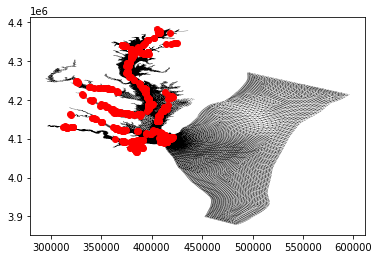

In [74]:
#Examples 5.1.2.1.3
#usage plot_bnd_quads

#find bad-quality quadrilaterals with minimum internel ange<70, or maximum angel>110
gd.check_quads(angle_min=70,angle_max=110,fname='data/bad_quad.bp')

#then display the locations of bad quads; 
gd.plot_bad_quads()

#note: data/bad_quad.bp can be imported into SMS to improve your grid

#### **5.1.2.2. interpolation**
  * **interp_node_to_elem**: interpolate node value to element
  * **interp_elem_to_node**: interpolate element value to node
  * **compute_acor**: compute area coordinate for interpolation 
  * **interp**: interpolate to get value at points
  * **inside_elem**: check whether pts are inside elements, then compute area coordinates for pts in elements
  * **inside_grid**: check whether pts are inside grid

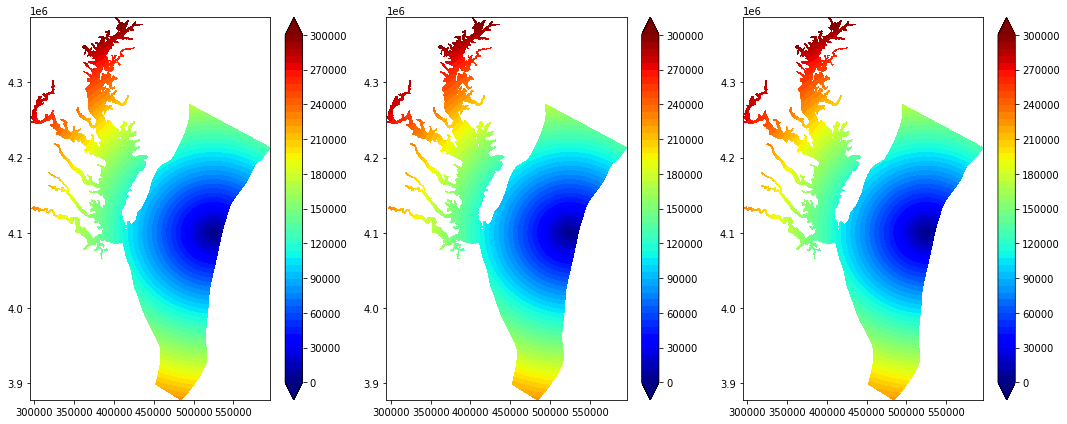

In [75]:
#Example 5.1.2.2.1
#usage of interp_node_to_elem, and interp_elem_to_node

#fake some spatial data based on dist from open boundary 
pvi=abs((gd.x+1j*gd.y)-(5.25e5+1j*4.1e6))

figure(figsize=[15,6])

subplot(1,3,1)
gd.plot(fmt=1,value=pvi,clim=[0,3e5],ticks=11)

subplot(1,3,2)
evi=gd.interp_node_to_elem(value=pvi) #from node to elem
gd.plot(fmt=1,value=evi,clim=[0,3e5],ticks=11)

subplot(1,3,3)
pvii=gd.interp_elem_to_node(value=evi) #from elem to node
gd.plot(fmt=1,value=pvii,clim=[0,3e5],ticks=11)

gcf().tight_layout()

computing grid boundaries
8638999:    3.800,    3.800
8632200:    5.595,    5.595
8638901:   11.988,   11.988
8638610:    6.310,    6.310
8637689:   10.236,   10.236
8636580:    4.479,    4.479
8635750:    0.658,    0.658
8635027:    1.000,    1.000
8632837:   12.908,   12.908
8577330:    6.871,    6.871
8575512:    0.500,    0.500
8574680:    5.835,    5.835
8573927:    8.340,    8.340
8571892:    6.288,    6.288
8571421:    3.055,    3.055


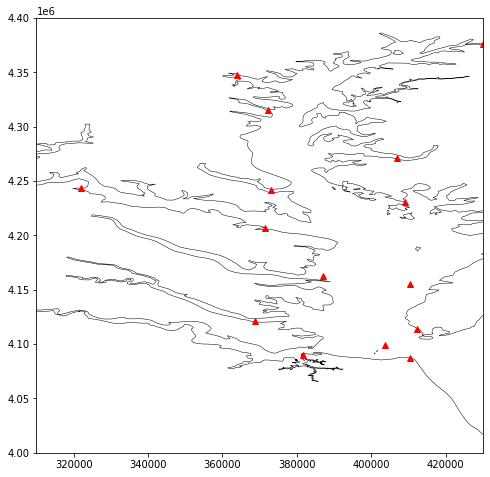

In [76]:
#Example 5.1.2.2.2
#usage of inside_grid, interp, and compute_acor

#get noaa stations inside_grid
bp=read_schism_bpfile('data/noaa_elev_station.bp')
xi,yi=proj_pts(bp.x,bp.y,'epsg:4326','epsg:26918')
sindp=gd.inside_grid(c_[xi,yi])
fp=sindp==1; pxi,pyi,stations=xi[fp],yi[fp],bp.station[fp]

#method 1: noaa stations
figure(figsize=[8,8])
gd.plot_bnd()
plot(pxi,pyi,'r^')
setp(gca(),xlim=[3.1e5,4.3e5],ylim=[4e6,4.4e6])

#interp depth at these stations (can accept other value instead of default depth)
dps1=gd.interp(c_[pxi,pyi])

#interp depths using compute_acor. where acor is area coordinates
ie,ip,acor=gd.compute_acor(c_[pxi,pyi])
dps2=(gd.dp[ip]*acor).sum(axis=1)

[print('{}: {:8.3f}, {:8.3f}'.format(i,k,m)) for i,k,m in zip(stations,dps1,dps2)];

#### **5.1.2.3. geometry**
refer to [link](#gd_attr) for the explaination of attributes 
  * **compute_all**: compute all geometry information of hgrid by invoking `compute_ctr(),compute_area(),compute_side(fmt=2),compute_nne(),compute_ic3()`
  * **compute_ctr**: compute element center information: `xctr,yctr,dpe`
  * **compute_area**: compute element area: `area`  
  * **compute_side**: compute side info: `ns,isidenode,isdel,xcj,ycj,dps,distj`  
  * **compute_nne** or **compute_node_ball**: compute nodal ball information: `nne,mnei,indel,ine`
  * **compute_ic3**: compute element-to-side table: `ic3, elside`
  * **compute_gradient**: compute gradient: `dpdx,dpdy,dpdxy,dpedx,dpedy,dpedxy`
  * **compute_bnd**: compute boundary information (saved in `gd.bndinfo`)

#### **5.1.2.4. boundary**
  * **compute_bnd**: compute grid boundary information
  * **write_bnd**: write boundary information
  * **create_bnd**: a GUI for defining open and land boundaries

(note. demo here: configure open/land boundaries for SCHISM model)

#### **5.1.2.5. read**
  * **read_hgrid**: read horizontal grid
  * **read_prop**: read *.prop file

In [77]:
#Example 5.1.2.5.1
#usage of read_hgrid

#the following two lines perform the same functions in reading a SCHISM hgrid
gd=read_schism_hgrid('data/hgrid.gr3')
gd=schism_grid(); gd.read_hgrid('data/hgrid.gr3')

In [78]:
#Example 5.1.2.5.2
#usage of read_prop

#write a prop file
fid=open('data/tvd.prop','w+'); fid.writelines(['{} 1\n'.format(i+1) for i in arange(gd.ne)]); fid.close()

#the following command returns the element value of 'tvd.prop' (element-based input file)
evi=gd.read_prop('data/tvd.prop')

#### **5.1.2.6. write**
  * **save**: save horizontal grid with different format
  * **write_hgrid**: save horizontal grid in *.gr3 format
  * **write_prop**: write *.prop file

In [79]:
#Example 5.1.2.6.1
#usage of save: save hgrid in different format

#method 1: save as *.npz 
gd.save('data/hgrid.npz') 
# or gd.save('data/hgrid') 

#method 2: save as *.pkl
gd.save('data/hgrid.pkl')

#to read hgrid.npz or hgrid.pkl (hgrd.pkl reads much faster)
t0=time.time(); gd=loadz('data/hgrid.npz').hgrid; dt1=time.time()-t0
t0=time.time(); gd=loadz('data/hgrid.pkl').hgrid; dt2=time.time()-t0
print(' reading hgrid.npz: {} s\n reading hgrid.pkl: {} s'.format(dt1,dt2))

#method 3: save as *.gr3, *.ll and *.ic format
#for these formats, gd.save is alias of gd.write_hgrid (see below)

 reading hgrid.npz: 0.014065027236938477 s
 reading hgrid.pkl: 0.003199338912963867 s


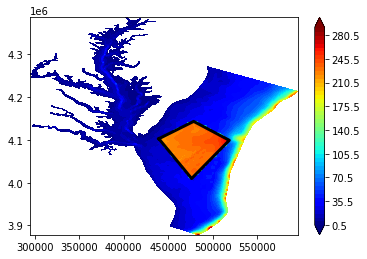

In [80]:
#Example 5.1.2.6.2
#usage of write_hgrid: save hgrid in *.gr3, *.ll and *.ic format

#method 1: if value is not given, gd.dp is used for default value
gd.write_hgrid('data/tmp.gr3')
gd.write_hgrid('data/tmp.ll')
gd.write_hgrid('data/tmp.ic')

#method 2: value=constant
gd.write_hgrid('data/tmp2.gr3',value=0.1) 

#method 3-1: value is array
pvi=arange(gd.np)/gd.np
gd.write_hgrid('data/tmp3.gr3',value=pvi)

#method 3-2: change value in region. 
bp=read_schism_bpfile('data/CS.bp')
sindp=inside_polygon(c_[gd.x,gd.y],bp.x,bp.y)==1
pvi=gd.dp.copy(); pvi[sindp]=pvi[sindp]+200
gd.write_hgrid('data/tmp4.gr3',value=pvi)

#plot
gd.plot(fmt=1,value=pvi)
pxi,pyi=close_data_loop(c_[bp.x,bp.y]).T
plot(pxi,pyi,'k-',lw=3)

In [81]:
#Example 5.1.2.6.3
#usage of write_prop: write *.prop file

#method 1: if value is not given, gd.dpe is used for default value
gd.write_prop('data/tmp1.prop')

#method 2: value=const
gd.write_prop('data/tmp2.prop',value=5)

#method 3: value=array[gd.ne]
gd.write_prop('data/tmp3.prop',value=10*ones(gd.ne))

# !head -n 10 data/tmp3.prop

#### **5.1.2.7. grid manipulation**
  * **grd2sms**: convert grid to SMS format and save *.2dm
  * **split_quads**: split quads with criteria
  * **check_quads**: check quads' quality 
  * **check_skew_elems**: check skew elements
  * **proj**: tranform grid's coordinate 

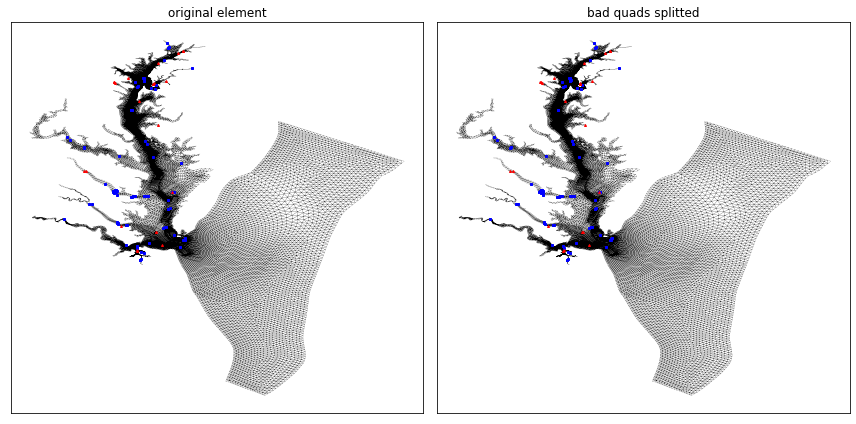

In [82]:
#Example 5.1.2.7.1
#pre-processing grid

#convert 2dm to gr3
sms2grd('data/CB.2dm','data/CB0.gr3')

#convert to ll
gd=read_schism_hgrid('data/CB0.gr3')
gd.lon,gd.lat=proj_pts(gd.x,gd.y,'epsg:26918','epsg:4326')

#check skew elements
gd.check_quads(angle_min=60, angle_max=120, fname='data/CB_bad_quad.bp')
gd.check_skew_elems(angle_min=15, fname='data/CB_skew_elem.bp')

#split quads
gd.split_quads(angle_min=60, angle_max=120, fname='data/CB.gr3')

#save grid infomation
gd=read_schism_hgrid('data/CB.gr3')
S=zdata(); S.hgrid=gd; save_npz('data/grid',S)

#plot 
gd0=read_schism_hgrid('data/CB0.gr3')
gd=loadz('data/grid.npz').hgrid
sbp=read_schism_bpfile('data/CB_skew_elem.bp')
qbp=read_schism_bpfile('data/CB_bad_quad.bp')

figure(figsize=[12,6])
subplot(1,2,1)
gd0.plot()
plot(qbp.x,qbp.y,'bs',ms=2)
plot(sbp.x,sbp.y,'r^',ms=2)
setp(gca(),xticks=[],yticks=[])
title('original element')
# setp(gca(),xlim=[3.9e5,4.11e5],ylim=[4.1075e6,4.125e6])

subplot(1,2,2)
gd.plot()
plot(qbp.x,qbp.y,'bs',ms=2)
plot(sbp.x,sbp.y,'r^',ms=2)
setp(gca(),xticks=[],yticks=[])
title('bad quads splitted')
# setp(gca(),xlim=[3.9e5,4.11e5],ylim=[4.1075e6,4.125e6])

gcf().tight_layout()

#### **5.1.2.8. shapefile**
  * **write_shapefile_bnd**: output grid's boundary as shpfile
  * **write_shapefile_node**: output grid's node as shpfile
  * **write_shapefile_element**: output grid's element as shpfile

In [83]:
#Example 5.1.2.8.1
#usage of write_shape_*: 

#read hgrid
gd=read_schism_hgrid('data/hgrid.gr3')

#write shapefiles for elements, nodes and boundary 
gd.write_shapefile_bnd('data/hgrid_bnd',prj='epsg:26918')
gd.write_shapefile_node('data/hgrid_node',prj='epsg:26918')
gd.write_shapefile_element('data/hgrid_elem',prj='epsg:26918')

## **5.2. vgrid**
* **schism_vgrid**: class of vertical grid
* **read_schism_vgrid**: read vgrid, and return object of schism_vgrid class    
* **compute_zcor**: compute z-coordinates

(1, 27075, 55, array([48, 46, 49, ..., 47, 47, 48]))

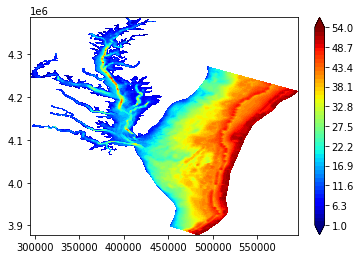

In [84]:
#Examples 5.2.1
#usgae of read_schism_vgrid and compute_zcor

#read SCHISM vertical grid
vd=read_schism_vgrid('data/vgrid.in')

#method=1: compute z-coordinate for all nodes
zcor1=vd.compute_zcor(gd.dp)

#method=2: compute z-coordinate for all nodes with 1m elevation
zcor2=vd.compute_zcor(gd.dp,eta=1) #or eta=ones(gd.np)

#plot number of vertical layer in space
nlayer=vd.nvrt-vd.kbp-1
gd.plot(fmt=1,value=nlayer,clim=[1,vd.nvrt-1],ticks=11)

#print vgrid attribute
vd.ivcor,vd.np,vd.nvrt,vd.kbp
# zcor1[0], zcor2[0]


##  **5.3. save hgrid and vgrid**
For working with SCHISM model, it is recommended to save grid information in *.npz (or *.pkl) format.  
* **save_schism_grid**: save grids (`hgrid.gr3, hgrid.ll, vgrid.in`) in *.npz file (not all grid files are required to run this function)

In [85]:
#Example 5.3.1
#usage of save_schism_grid

#method 1: read and save grid information
save_schism_grid(fname='data/grid',path='data') 
#save_schism_grid() #same as above if executed this command in data

#method 2: read and save grid information (same as above)
gd=read_schism_hgrid('data/hgrid.gr3')
gdl=read_schism_hgrid('data/hgrid.ll'); gd.lon,gd.lat=gdl.x,gdl.y #better method: gd.lon,gd.lat=proj_pts(...)
vd=read_schism_vgrid('data/vgrid.in')
s=zdata(); s.hgrid=gd; s.vgrid=vd; savez('data/grid.npz',s)


## **5.4. ACE bp/reg file**
ACE bp/reg file refers to a series of points, where reg file assumes a polygon with points as its vertices. 
* **schism_bpfile**: class of points
* **read_schism_bpfile**: read point information from ACE/gredit bpfile
* **read_schism_reg**: read point information from ACE/gredit regfile

In [86]:
#Example 5.4.1 
#usage of schism_bpfile: create a bpfile/reg and save it

#fake some data
npt=10; xi=linspace(0,pi,npt); yi=sin(xi);  zi=arange(npt)

#create bpfile
bp=schism_bpfile() 
bp.nsta,bp.x,bp.y,bp.z=npt,xi,yi,zi
# bp.station=['{}'.format(i+1) for i in arange(npt)] #can append stations for each pts

#write bpfile and reg file
bp.write_bpfile('data/tmp5.bp')
bp.write_reg('data/tmp5.reg') #same as bp.write_bpfile('data/tmp5.reg',fmt=1)

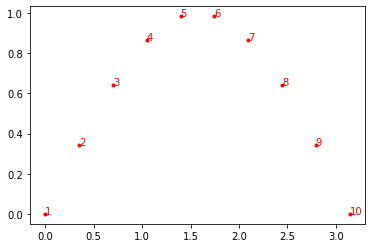

In [87]:
#Example 5.4.2
#usage of read_schism_bpfile and read_schism_reg

#read file
bp=read_schism_bpfile('data/tmp5.bp')
reg=read_schism_reg('data/tmp5.reg') 
#reg=read_schism_bpfile('data/tmp5.reg',fmt=1) #same as above

#write shapefile 
bp.write_shapefile('data/tmp5','epsg:4326')

#plot
bp.plot_station();

##  **5.5. interpolation**
`interp_schism_3d` is used to interp multiple 3D variables at the same time. This functionality is still under development. It is not very easy to use, but you can try it now. 
* **interp_schism_3d**: 3D interpolation for multiple variables

##  **5.6. schism parameter**
* **read_schism_param**: read parameters from inputs files (e.g.s. param.nml, param.in, cosine.in)
* **write_schism_param**: write parameters files

In [88]:
#Example 5.6.1
#usage of read_schism_param and write_schism_param

#read parameter
param=read_schism_param('data/param.nml')
param=read_schism_param('data/param.nml',fmt=1) #convert string to float

#write parameter file
param['nws']=0
write_schism_param('data/param.nml.changed',param)

##  **5.7. grid generation**
* **sms2grd**: convert `*.2dm` to `*.gr3`
* **grd2sms**: convert `*.gr3` to `*.2dm`
* **scatter_to_schism_grid**: create a horizontal grid from scatter points
* **delete_schism_grid_element**: remove hgrid's elements based on conditions
* **create_schism_vgrid**: create a vertical grid

In [89]:
#Example 5.7.1
#usage of sms2grd

#please refer to Example 5.1.2.7.1

In [90]:
#Example 5.7.2
#usgae of grd2sms: 
grd2sms('data/CB.gr3','data/tmp.2dm')

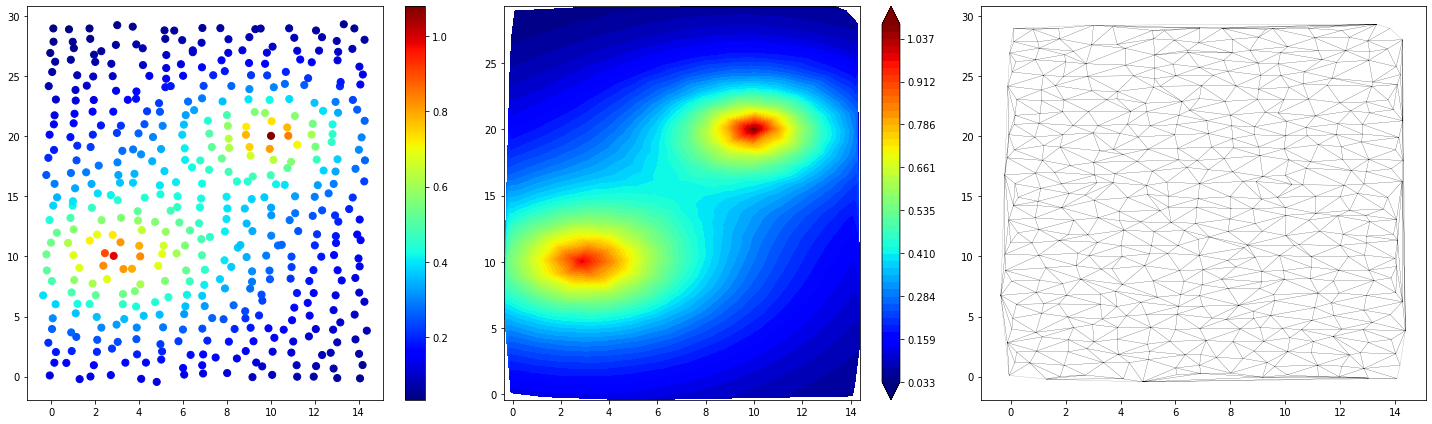

In [91]:
#Example 5.7.3 
#usage of scatter_to_schism_grid

#fake some data
xi,yi=meshgrid(arange(15),arange(30)); npt=xi.size
xi,yi=xi.ravel(),yi.ravel() #convert 2D array to 1D array
xi=xi+randn(npt)/5; yi=yi+randn(npt)/5  #add some random shift
zi=exp(-abs((xi+1j*yi)-(3+1j*10))/5)+exp(-abs((xi+1j*yi)-(10+1j*20))/3)

#create schism grid
gd=scatter_to_schism_grid(c_[xi,yi,zi])
# gd=scatter_to_schism_grid(c_[xi,yi,zi],angle_min=10)

#plots
figure(figsize=[20,6]); set_cmap('jet')

subplot(1,3,1)
scatter(xi,yi,s=50,c=zi); colorbar()

subplot(1,3,2)
gd.plot(fmt=1)

subplot(1,3,3)
gd.plot()

gcf().tight_layout()

In [92]:
#Example 5.7.4
#usage of create_schism_vgrid

#method 1: pure S 
create_schism_vgrid('data/vgrid.in.1',nvrt=15)

#method 2: SZ 
nvrt=54
zlevels=[-5e3,-2300,-1800,-1400,-1000,-770,-570,-470,-390,-340,
         -290,-240,-190,-140,-120,-100,-105,-100]
h_c, theta_b, theta_f=30.0, 0.7, 5.0
create_schism_vgrid('data/vgrid.in.2',nvrt=nvrt,zlevels=zlevels,
                    h_c=h_c,theta_b=theta_b,theta_f=theta_f)

#ivcor=1: LSC^2
#this functionality is still under development

## **5.8. post-processing**
These functions below are normally used for post-processing SCHISM model results. However, they are probably not needed for the lastest format of SCHISM outputs.
* **getglob**: get global information about schism run (ne,ns,np,nvrt,nproc,ntracers,ntr)
* **srank**: return string of schism rank number ('0032', or '000032')
* **read_schism_local_to_global**: read schism partition information


# **6. Scripts based on Pylibs**

In pylibs/pyScripts, many sample scripts using pylibs are shared for different purposes. Some of these scripts are outdated, or need to be modified under your enviroment. The key is that the algorithms triumph others, and you can change them to suit for your needs. 

## **6.1. SCHISM Job Management**
* file strcutures: 1). readme, 2). runDir, 3). inputDir, 4). gridDir, 5).databsae,5). resultsDir, 6). SCHISM code  (demo)
* `checkrun.py`: check run status and progress
* `cmake_schism.py`: compile schism code with git version record
* `copy_run.py`: use to set up run 
* `Dparam.py`: read parameters
* `run.schism`: submit jobs 


## **6.2. Pre-Processing**
* `gen_bctides.py`: generate bctides.in with harmonics
* `gen_hycom_3Dth.py`: generate SCHISM inputs (`elev2D.th.nc`,`TEM_3D.th.nc`,`SAL_3D.th.nc`,`uv3D.th.nc`) based on HYCOM model
* `gen_hycom_hotstart.py`: generate SCHISM `hotstart.nc` based on HYCOM model
* `gen_hycom_nudge.py`: generate SCHISM nudge inputs (`TEM_nu.nc`,`SAL_nu.nc`) based on HYCOM model
* `gen_fluxflag.py`: generate `fluxflag.prop` based on ACE regions
* `gen_narr_sflux.py`: generate narr database
* `gen_vqs.py`: generate SCHISM LCS$^2$ coordinates 
* `make_sflux_links.py`: generate `sflux` direcotry for SCHISM model 
* `make_sflux_subdomain.py`: used to shrink sflux files 
* `pload_depth.py`: script to interpodate DEM onto SCHISM grid.

## **6.3 Post-Processing**
* `pextract_schism_fabm_xyz.py`: extract time series at (x,y,z) from FABM model results 
* `pextract_schism_slab.py`: extract slabs from SCHISM model results 
* `pextract_schism_tide.py`: perform HA for SCHISM model results (co-tidal charts)
* `pextract_schism_xyz.py`: extract time series at (x,y,z) from SCHISM model results 
* `pcompute_flux.py`: compute fluxes from SCHISM results
* `run.cmb_outputs`: used to combine SCHISM outputs
* `run.cmb_hotstart`: used to combine SCHISM hotstart

## **6.4 parallel program using pylib**
pylibs provides a framewor for parallel programing, but it needs configration on each system. If users are interested, you can contact us for more information on how to build up the framework on your local machine. 

# **7. List of Fucntions/Classes in pylib module**  <a name="LoF"></a>

* **pylib module** includes two submodules: **mylib** and **schism_file**. 
* **mylib** contains all self-defined functions for general purpose
* **schism_file** contains all self-defined functions related to SCHISM


## **7.1. mylib**
* data capsule
  * **zdata**: an empty class with its attributs used to store data/object 
  * **savez**: save zdata as a numpy dataset (*.npz format)
  * **loadz**: load zdata

* time manipulation
  * **datenum**: convert date-time to a date number
  * **get_xtick**: generate xticks and xticklables for plotting
  * **find_cs**: use to identily locations of data gaps in a time series
  * **daytime_length**: compute daytime length based on latitude and day_of_year

* data analysis
  * **lpfilt**: low-pass filter
  * **smooth**: smooth function
  * **mfft**: Perform FFT for a time series
  * **get_stat**: return frequently used statistics 
  * **least_square_fit**: perform least square function

* harmonic analysis
  * **harmonic_analysis**: get tidal harmonic consituents from time sereis
  * **harmonic_fit**: use harmonic consituents to compute time series

* netcdf
  * **ReadNC**: read netcdf file content as zdata format
  * **WriteNC**: write netcdf file content 

* projection: 
  * **proj**: convert coordinates between different projections
  * **proj_pts**: convert coordinates of points between different projections
  * **get_prj_file**: get string of projection file (*.prj) 

* shapefile
  * **read_shapefile_data**: read shapefile as zdata format
  * **write_shapefile_data**: write shapefile

* geometry related
  * **inside_polygon**: identify the points inside a polygon
  * **near_pts**: find the indices of nearest points 

* DEM related
  * **convert_dem_format**: convert DEM file in *.asc format to *.npz format
  * **load_bathymetry**: interoplated DEM data to points
  * **compute_contour**: extract contours from a 2D data 

* plot
  * **plot_taylor_diagram**: a function to play taylor diagram
  * **get_subplot_position**: get axes of subplots
  * **move_figure**: move figure to certain position 

* system related
  * **command_outputs**: run a system command, and grab the outpus
  * **get_hpc_command**: get commands for submmitting or running HPC jobs.

* misc
  * **rewrite**: function to rewrite file in-situ based on conditions
  * **rewrite_input**: function to rewrite the inputs in job-submit scripts
  * **read_yaml**: read parameter in yaml file
  * **mdivide**: perform matrix division B/A
  * **signa**: compute signed area for triangles
  * **close_data_loop**: if xi[0,...]!=xi[-1,...], then,add xi[0,...] in the end
  * **convert_matfile**: convert matlab file (*.mat) to zdata (*.npz)
  * **get_hycom**: extract Hycom time series at stations (maybe outdated)


## **7.2. schism_file**
  * hgrid
    * **schism_grid**: class of horizontal grid
    * **read_schism_hgrid**: read hgrid.gr3, and return object of schism_grid class
  * vgrid
    * **schism_vgrid**: class of vertical grid
    * **read_schism_vgrid**: read vgrid, and return object of schism_vgrid class    
    * **compute_zcor**: compute z-coordinates
  * save hgrid and vgrid
    * **save_schism_grid**: save grids (hgrid.gr3, hgrid.ll, vgrid.in) in *.npz file
  * interpolation
    * **interp_schism_3d**: 3D interpolation for multiple variables
  * ACE bp/reg file
    * **schism_bpfile**: class of points
    * **read_schism_bpfile**: read point information from ACE/gredit bpfile
    * **read_schism_reg**: read point information from ACE/gredit regfile
  * schism parameter
    * **read_schism_param**: read parameters from inputs files (e.g.s. param.nml, param.in, cosine.in)
    * **write_schism_param**: write parameters files
  * grid generation
    * **sms2grd**: convert *.2dm to *.gr3
    * **grd2sms**: convert *.gr3 to *.2dm
    * **scatter_to_schism_grid**: create a horizontal grid from scatter points
    * **delete_schism_grid_element**: remove hgrid's elements based on conditions
    * **create_schism_vgrid**: create a vertical grid
  * post-processing
    * **getglob**: get global information about schism run (ne,ns,np,nvrt,nproc,ntracers,ntr)
    * **srank**: return string of schism rank number ('0032', or '000032')
    * **read_schism_local_to_global**: read schism partition information

  




##  **7.3. attributes of hgrid**
* **3.1. node**
  * **np**: numbers of nodes
  * **x**, **y**, **dp**: x&y coordinates and depth
  * **lon**, **lat**: longitude&latitude (may not exist)
* **3.2 element**
  * **np**: numbers of elements
  * **i34**: element types
  * **elnode**: element to node table
  * **xctr**, **yctr**, **dpe**: the x&y coordinates and depth at element center
  * **area**: element area
  * **elside**: element to side table
  * **ic3**: element-side-element table
* **3.3 side** 
  * **ns**: numbers of sides
  * **isidenode**: side to node table
  * **isdel**: side to element table
  * **xcj**, **ycj**, **dps**: the x&y coordinates and depth at side center
  * **distj**: side length
* **3.4 node ball**
  * **mnei**:  maximum number of elements in nodal ball
  * **nne**:   number of elements in nodal ball
  * **indel**: indices for each nodal ball
  * **ine**:   indices for each nodal ball, but with maxtrix shape=[np,mnei]
* **3.5 bnoundary**
  * **nob**: number of open boundary segments
  * **nobn**: number of nodes on each open boundary segment
  * **iobn**: node indices of each open boundary segment
  * **nlb**: number of land boundary segments 
  * **nlbn**: number of nodes on each land boundary segment  
  * **ilbn**: node indices of each land boundary segment
  * **island**: flag for wheter land boundary segment is a enclosed island
* **3.6 gradient**
  * **dpdx**: gradient along x-axis at node
  * **dpdx**: gradient along y-axis at node
  * **dpdxy**: gradient magnitude at node
  * **dpedx**: gradient along x-axis at element
  * **dpedx**: gradient along y-axis at element
  * **dpedxy**: gradient magnitude at element



## **7.4. methods of hgrid**

* **4.1. plot**
  * **plot_grid** or **plot**: plot grid and/or depth
  * **plot_bnd**: plot grid boundary
  * **plot_bad_quads**: plot locations of bad-quality quads

* **4.2. interpolation**
  * **interp_node_to_elem**: interpolate node value to element
  * **interp_elem_to_node**: interpolate element value to node
  * **compute_acor**: compute area coordinate for interpolation 
  * **interp**: interpolate to get value at points
  * **inside_elem**: check whether pts are inside elements, then compute area coordinates for pts in elements
  * **inside_grid**: check whether pts are inside grid

* **4.3. geometry**
  * **compute_all**: compute all geometry information of hgrid
  * **compute_ctr**: compute element center information: xctr,yctr,dpe
  * **compute_area**: compute element area
  * **compute_bnd**: compute boundary information
  * **compute_nne** or **compute_node_ball**: compute nodal ball information: nne,mnei,indel,ine
  * **compute_ic3**: compute element-to-side table
  * **compute_gradient**: compute gradient

* **4.4. boundary**
  * **compute_bnd**: compute grid boundary information
  * **write_bnd**: write boundary information
  * **create_bnd**: a GUI for defining open and land boundaries

* **4.5. read**
  * **read_hgrid**: read horizontal grid
  * **read_prop**: read *.prop file

* **4.6. write**
  * **save**: save horizontal grid with different format
  * **write_hgrid**: save horizontal grid in *.gr3 format
  * **write_prop**: write *.prop file

* **4.7. grid manipulation**
  * **grd2sms**: convert grid to SMS format and save *.2dm
  * **split_quads**: split quads with criteria
  * **check_quads**: check quads' quality 
  * **check_skew_elems**: check skew elements
  * **proj**: tranform grid's coordinate 

* **4.8. shapefile**
  * **write_shapefile_bnd**: output grid's boundary as shpfile
  * **write_shapefile_node**: output grid's node as shpfile
  * **write_shapefile_element**: output grid's element as shpfile

## **7.5. attributes/methods of vgrid**
* **attributes**:
  * **ivcor**: type of vertical grid
  * **nvrt**: number of vertical layers
  * **ivcor==1**: LCS$^2$ coordinate
    * **kbp**: indices of bottom layer
    * **np**: number of nodes in hgrid.gr3
    * **sigma**: sigma coordinates (np,nvrt)
  * **ivcor==2**: SZ coorindate
    * **kz**: 
    * **h_s**: 
    * **ztot**:
    * **sigma**:
    * **nsig**:
    * **h_c**:
    * **theta_b**:
    * **theta_f**:
* methods:
  * **compute_zcor**: compute z-coordinate
  * **read_vgrid**: read information of vertical grid
  * **write_vgrid**: write vgrid.in in different format


## **7.6. attributes/methods of bp/reg**
* attributes
  * nsta
  * x
  * y 
  * z
  * station

* methods
  * compute_acor
  * read_bpfile
  * get_unique_pts
  * plot_station
  * write_bpfile
  * write_reg
  * write_shapefile


